In [1]:
import astropy.io
import astropy.units as u
import matplotlib.pyplot as plt
import aplpy

In [2]:
def fix_aplpy_fits(aplpy_obj, dropaxis=2):
    """This removes the degenerated dimensions in APLpy 2.X...
    The input must be the object returned by aplpy.FITSFigure().
    `dropaxis` is the index where to start dropping the axis (by default it assumes the 3rd,4th place).
    """
    temp_wcs = aplpy_obj._wcs.dropaxis(dropaxis)
    temp_wcs = temp_wcs.dropaxis(dropaxis)
    aplpy_obj._wcs = temp_wcs


In [3]:
im = '/Users/grant/tmp/dsharp/AS209/visibilities/AS209_continuum.fits'
res = 'as209/as209_flat/residuals/residuals.fits'

In [84]:
im = '/Users/grant/astro/data/alma/hr4796_c3/hr4796.fits'
res = 'vis-r_1gauss/residuals/residual.fits'

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.002e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.268e-01 [aplpy.core]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -7.722e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.275e-02 [aplpy.core]


Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7fe9f9e6ee50>
Traceback (most recent call last):
  File "/Users/grant/opt/anaconda3/envs/casa/lib/python3.8/weakref.py", line 58, in _cb
    callback(self)
  File "/Users/grant/opt/anaconda3/envs/casa/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 254, in _remove_proxy
    del self.callbacks[signal][cid]
KeyError: 'changed'


INFO: Auto-setting vmin to -1.811e-01 [aplpy.core]


/var/folders/xz/wtc1z8951gz41xypk5k5jbjw0000gn/T/ipykernel_38499/3680429963.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


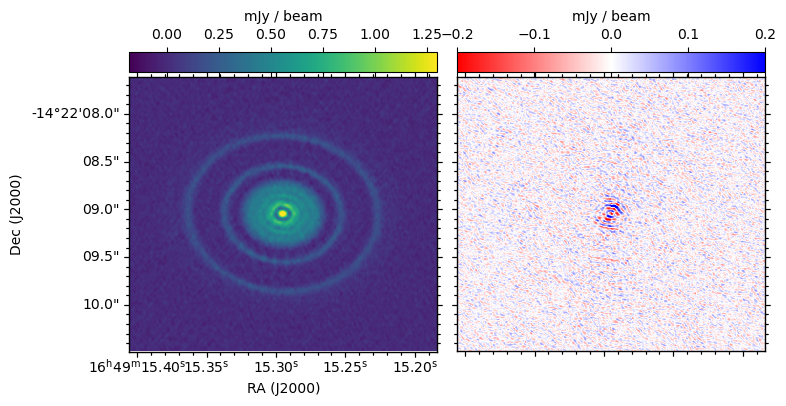

In [ ]:
# hack for UTC in file but astropy wants utc
h1 = astropy.io.fits.open(im)
h1[0].header['TIMESYS'] = h1[0].header['TIMESYS'].lower()
h2 = astropy.io.fits.open(res)
h2[0].header['TIMESYS'] = h2[0].header['TIMESYS'].lower()

h1[0].data *= 1e3
h2[0].data *= 1e3

fig = plt.figure(figsize=(8, 4))

f1 = aplpy.FITSFigure(h1[0], figure=fig, subplot=[0.15,0.14,0.42,0.75])
fix_aplpy_fits(f1)

f2 = aplpy.FITSFigure(h2[0], figure=fig, subplot=[0.56,0.14,0.42,0.75])
fix_aplpy_fits(f2)

for f, h in ((f1,h1), (f2,h2)):
    f.recenter(h[0].header['CRVAL1']*u.deg, h[0].header['CRVAL2']*u.deg, radius=0.0004)
    f.show_colorscale()
    f.add_colorbar()
    f.colorbar.set_location('top')
    f.colorbar.set_axis_label_text('mJy / beam')

# f1.show_colorscale(vmax=0.99)
f2.show_colorscale(vmin=-0.2, vmax=0.2, cmap='bwr_r')
f1.show_colorscale(vmax=1.3)
# f2.show_colorscale(cmap='bwr_r')

f2.tick_labels.hide_y()
f2.axis_labels.hide_y()
f2.tick_labels.hide_x()
f2.axis_labels.hide_x()

fig.tight_layout()
fig.savefig('../doc/resid.pdf')
# fig.canvas.draw()
# h1.close()
# h2.close()
# f1.close()
# f2.close()
# plt.close(fig)